In [2]:
import sys
sys.path.append('..')
import matplotlib.pyplot as plt
import seaborn as sns
from mne.decoding import ReceptiveField
import pickle
import numpy as np
import  modin.pandas as pd
import os
from tqdm import tqdm
from NRC import NRC,recordModule
from matplotlib.pyplot import MultipleLocator
from matplotlib.gridspec import GridSpec
from utils import returnSpec
from distributed import Client
client = Client()

# Sweep

## 40-target classification

In [4]:
scores = []
add = '../results/sweep'
subs = os.listdir(add)
subs.remove('.DS_Store')
for sub in subs:
    subFolder = add+os.sep+sub 
    f = pd.read_csv(subFolder+os.sep+'classification.csv')
    scores.append(f)

scores = pd.concat(scores,ignore_index=True).drop_duplicates()
scores.head()

,Unnamed: 0,score,winLEN,tag,cv,seed,subject
0,0,0.925,0.3,wn,0,0.0,chenyuzhen
1,1,0.950,0.3,wn,1,0.0,chenyuzhen
2,2,0.925,0.3,wn,2,0.0,chenyuzhen
3,3,0.925,0.3,wn,3,0.0,chenyuzhen
4,4,0.850,0.3,wn,4,0.0,chenyuzhen


In [5]:
aveScore = scores.groupby(['seed','subject'],as_index=False).mean()
aveScore = aveScore.sort_values(by='score',ascending=False)
aveScore

Please refer to https://modin.readthedocs.io/en/stable/supported_apis/defaulting_to_pandas.html for explanation.


,seed,subject,Unnamed: 0,score,winLEN,cv
3017,603.0,miaoyining,9620.5,1.000000,0.3,2.5
1132,226.0,miaoyining,7358.5,1.000000,0.3,2.5
4817,963.0,miaoyining,11780.5,1.000000,0.3,2.5
2862,572.0,miaoyining,9434.5,1.000000,0.3,2.5
1687,337.0,miaoyining,8024.5,1.000000,0.3,2.5
...,...,...,...,...,...,...
1946,389.0,huyijun,2336.5,0.579167,0.3,2.5
1581,316.0,huyijun,1898.5,0.575000,0.3,2.5
2396,479.0,huyijun,2876.5,0.562500,0.3,2.5
591,118.0,huyijun,710.5,0.558333,0.3,2.5


<AxesSubplot:xlabel='score', ylabel='Density'>

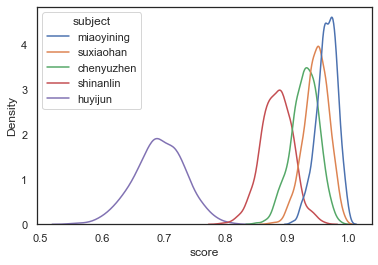

In [6]:
sns.set_theme(style='white')
sns.kdeplot(data=aveScore,x='score',hue='subject')

## 160 classification

In [8]:
allClass = []
add = '../results/sweep'
subs = os.listdir(add)
subs.remove('.DS_Store')
for sub in subs:
    subFolder = add+os.sep+sub 
    if os.path.exists(subFolder+os.sep+'classification-160.csv'):
        f = pd.read_csv(subFolder+os.sep+'classification-160.csv')
        allClass.append(f)

allClass = pd.concat(allClass,ignore_index=True).drop_duplicates()
allClass.head()

,Unnamed: 0,score,winLEN,tag,cv,seed,subject
0,0,0.56250,0.2,wn,0,0,chenyuzhen
1,1,0.83125,0.3,wn,0,0,chenyuzhen
2,2,0.94375,0.4,wn,0,0,chenyuzhen
3,3,0.99375,0.5,wn,0,0,chenyuzhen
4,4,0.98750,0.6,wn,0,0,chenyuzhen


In [9]:
allClass[allClass.subject=='miaoyining'].head()

,Unnamed: 0,score,winLEN,tag,cv,seed,subject
96,48,0.71875,0.2,wn,0,0,miaoyining
97,49,0.95625,0.3,wn,0,0,miaoyining
98,50,1.00000,0.4,wn,0,0,miaoyining
99,51,1.00000,0.5,wn,0,0,miaoyining
100,52,1.00000,0.6,wn,0,0,miaoyining


<AxesSubplot:xlabel='winLEN', ylabel='score'>

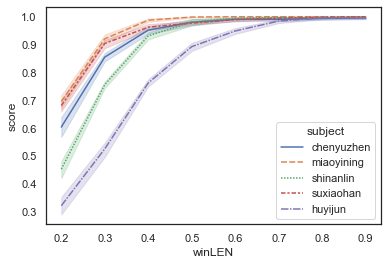

In [10]:
sns.set_theme(style='white')
f,ax = plt.subplots()
sns.lineplot(data=allClass,x='winLEN',y='score',hue='subject',style='subject')

# Speller

AttributeError: 'list' object has no attribute 'subject'

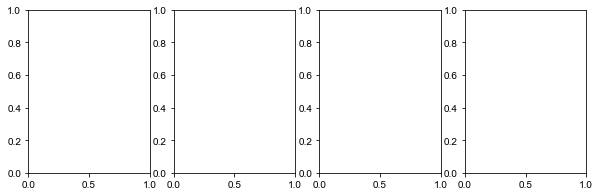

In [3]:
f,axs = plt.subplots(1,4,figsize=(10,3))
sns.set_theme(style='white')
for ax,sub in zip(axs,scores.subject.unique()):
    sns.lineplot(data=scores[scores.subject==sub],x='winLEN',y='score',hue='tag',ax=ax)
    ax.set_title('%s'%sub)
    sns.despine()
plt.tight_layout()
plt.savefig('./images/wn.png',format='png',dpi=300)

In [4]:
scores = []
add = '../results/confirm'
subs = os.listdir(add)
for sub in subs:
    subFolder = add+os.sep+sub
    f = pd.read_csv(subFolder+os.sep+'classification.csv')
    scores.append(f)

scores = pd.concat(scores, ignore_index=True).drop_duplicates()
scores.head()


,Unnamed: 0,score,winLEN,tag,cv,seed,subject
0,0,0.375,0.2,wn,0,0,huangchangxing
1,1,0.575,0.3,wn,0,0,huangchangxing
2,2,0.750,0.4,wn,0,0,huangchangxing
3,3,0.775,0.5,wn,0,0,huangchangxing
4,4,0.875,0.6,wn,0,0,huangchangxing


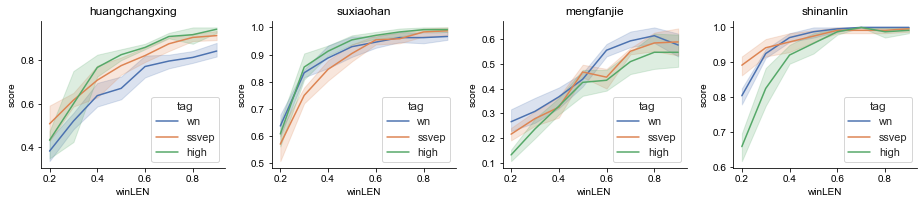

In [4]:
f,axs = plt.subplots(1,4,figsize=(13,3))
sns.set_theme(style='white')
for ax,sub in zip(axs,scores.subject.unique()):
    sns.lineplot(data=scores[scores.subject==sub],x='winLEN',y='score',hue='tag',ax=ax)
    ax.set_title('%s'%sub)
    sns.despine()
plt.tight_layout()
# plt.savefig('./images/wn.png',format='png',dpi=300)

<AxesSubplot:xlabel='winLEN', ylabel='score'>

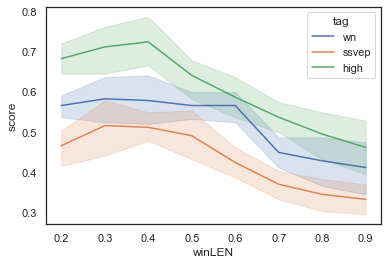

In [5]:
f,ax = plt.subplots()
sns.lineplot(data=scores[scores.subject=='zhaoxiaobai'],x='winLEN',y='score',hue='tag')
# ax.set_xlim([0.2,0.6])
# ax.set_ylim([0.9,1])

# Dense

In [10]:
dense = []
add = '../results/dense'
subs = os.listdir(add)
# subs.remove('.DS_Store')
for sub in subs:
    subFolder = add+os.sep+sub 
    if os.path.exists(subFolder+os.sep+'classification-dense.csv'):
        f = pd.read_csv(subFolder+os.sep+'classification-dense.csv')
        dense.append(f)


dense = pd.concat(dense,ignore_index=True).drop_duplicates()
dense.head()

,Unnamed: 0,score,winLEN,tag,cv,seed,subject
0,0,0.17500,0.2,ssvep,0,0,huangchangxing
1,1,0.30625,0.3,ssvep,0,0,huangchangxing
2,2,0.51250,0.4,ssvep,0,0,huangchangxing
3,3,0.59375,0.5,ssvep,0,0,huangchangxing
4,4,0.59375,0.6,ssvep,0,0,huangchangxing


Text(0.5, 0.98, '160 classification:single target paradigm')

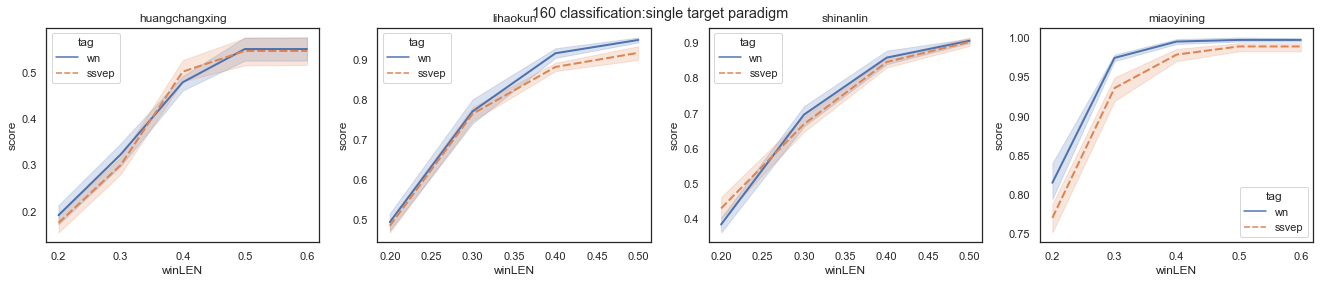

In [11]:
nSub = len(dense.subject.unique())
sns.set_theme(style='white')
f,axes = plt.subplots(ncols=nSub,nrows=1,figsize=(18.5,4))
for (sub,ax) in zip(dense.subject.unique(),axes.flatten()):

    sns.lineplot(data=dense[dense.subject==sub],x='winLEN',y='score',hue='tag',style='tag',ax=ax,hue_order=['wn','ssvep'],style_order=['wn','ssvep'],linewidth=2)
    ax.set_title('%s'%sub)

plt.tight_layout()
plt.suptitle('160 classification:single target paradigm')
# plt.savefig('../images/160single.png',dpi=300)

## distribution

In [5]:
dense = []
add = '../results/dense'
subs = os.listdir(add)
# subs.remove('.DS_Store')
for sub in subs:
    subFolder = add+os.sep+sub 
    if os.path.exists(subFolder+os.sep+'classification-dense-random.csv'):
        f = pd.read_csv(subFolder+os.sep+'classification-dense-random.csv')
        dense.append(f)

dense = pd.concat(dense,ignore_index=True).drop_duplicates()
dense.head()

,Unnamed: 0,score,winLEN,tag,cv,seed,subject
0,0,0.550,0.3,wn,0,0,huangchangxing
1,1,0.525,0.3,wn,1,0,huangchangxing
2,2,0.500,0.3,wn,2,0,huangchangxing
3,3,0.575,0.3,wn,3,0,huangchangxing
4,4,0.475,0.3,wn,4,0,huangchangxing


In [6]:
denseAve = dense.groupby(['seed','subject','tag'],as_index=False).mean()
denseAve = denseAve.sort_values(by='score',ascending=False)
denseAve.head()

Please refer to https://modin.readthedocs.io/en/stable/supported_apis/defaulting_to_pandas.html for explanation.


,seed,subject,tag,Unnamed: 0,score,winLEN,cv
1125,140,miaoyining,wn,5642.5,1.0,0.3,2.5
1485,185,miaoyining,wn,5912.5,1.0,0.3,2.5
1477,184,miaoyining,wn,5906.5,1.0,0.3,2.5
309,38,miaoyining,wn,5030.5,1.0,0.3,2.5
1565,195,miaoyining,wn,5972.5,1.0,0.3,2.5


Text(0.5, 1.0, '40 target classification results(T=0.3s)')

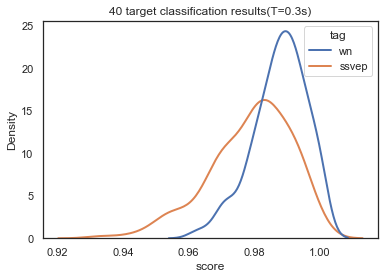

In [7]:
f,ax = plt.subplots()
sns.set_theme(style='white')
sns.kdeplot(data=denseAve[denseAve.subject=='miaoyining'], x='score', hue='tag',linewidth=2)
ax.set_title('40 target classification results(T=0.3s)')
# plt.savefig('../images/160random40.png',dpi=400)

Text(0.5, 0.98, '160 classification:single target paradigm')

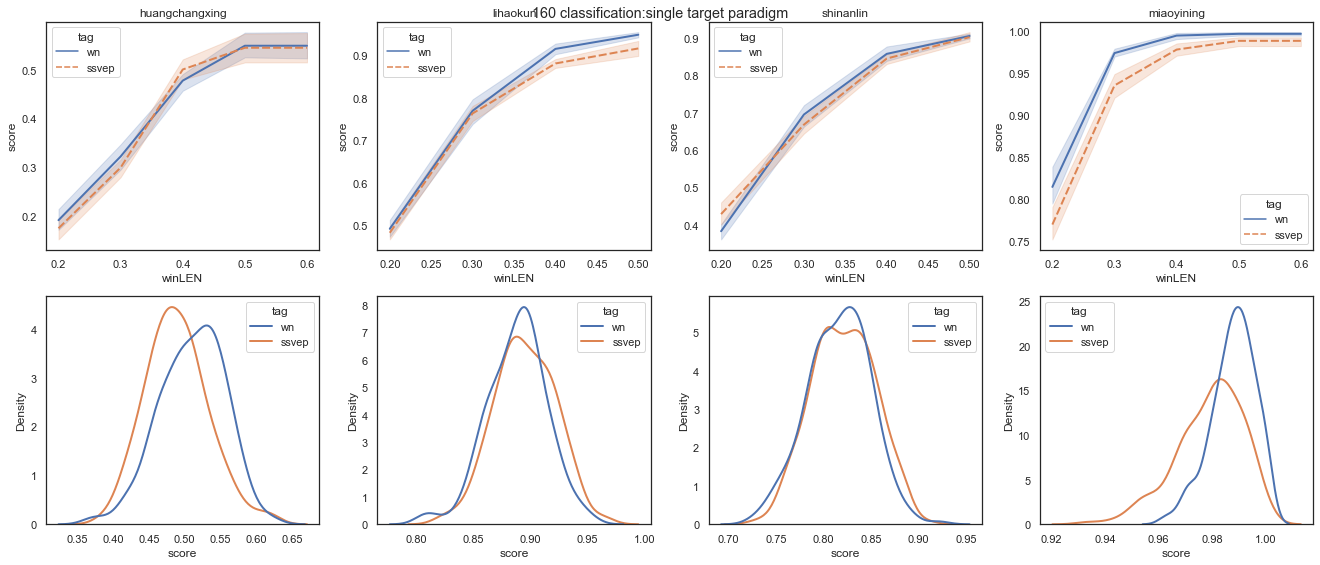

In [23]:
nSub = len(dense.subject.unique())
sns.set_theme(style='white')
f, axes = plt.subplots(ncols=nSub, nrows=2, figsize=(18.5, 8))
for (sub, ax) in zip(dense.subject.unique(), axes.T):

    sns.lineplot(data=dense[dense.subject == sub], x='winLEN', y='score', hue='tag',
                 style='tag', ax=ax[0], hue_order=['wn', 'ssvep'], style_order=['wn', 'ssvep'], linewidth=2)
    ax[0].set_title('%s' % sub)

    sns.kdeplot(data=denseAve[denseAve.subject==sub], x='score', hue='tag',linewidth=2,ax=ax[1],hue_order=['wn','ssvep'])

    # ax[0].set_title('%s' % sub)
    
plt.tight_layout()
# plt.suptitle('160 classification:single target paradigm')
plt.savefig('../images/160single.png',dpi=300)